In [1]:
import h5py
import numpy as np
import matplotlib
from IPython.display import Image
from scipy.misc import imsave
from scipy.stats import threshold

/home/kwierman/.virtualenvs/dl/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `threshold` is deprecated!
stats.threshold is deprecated in scipy 0.17.0
  


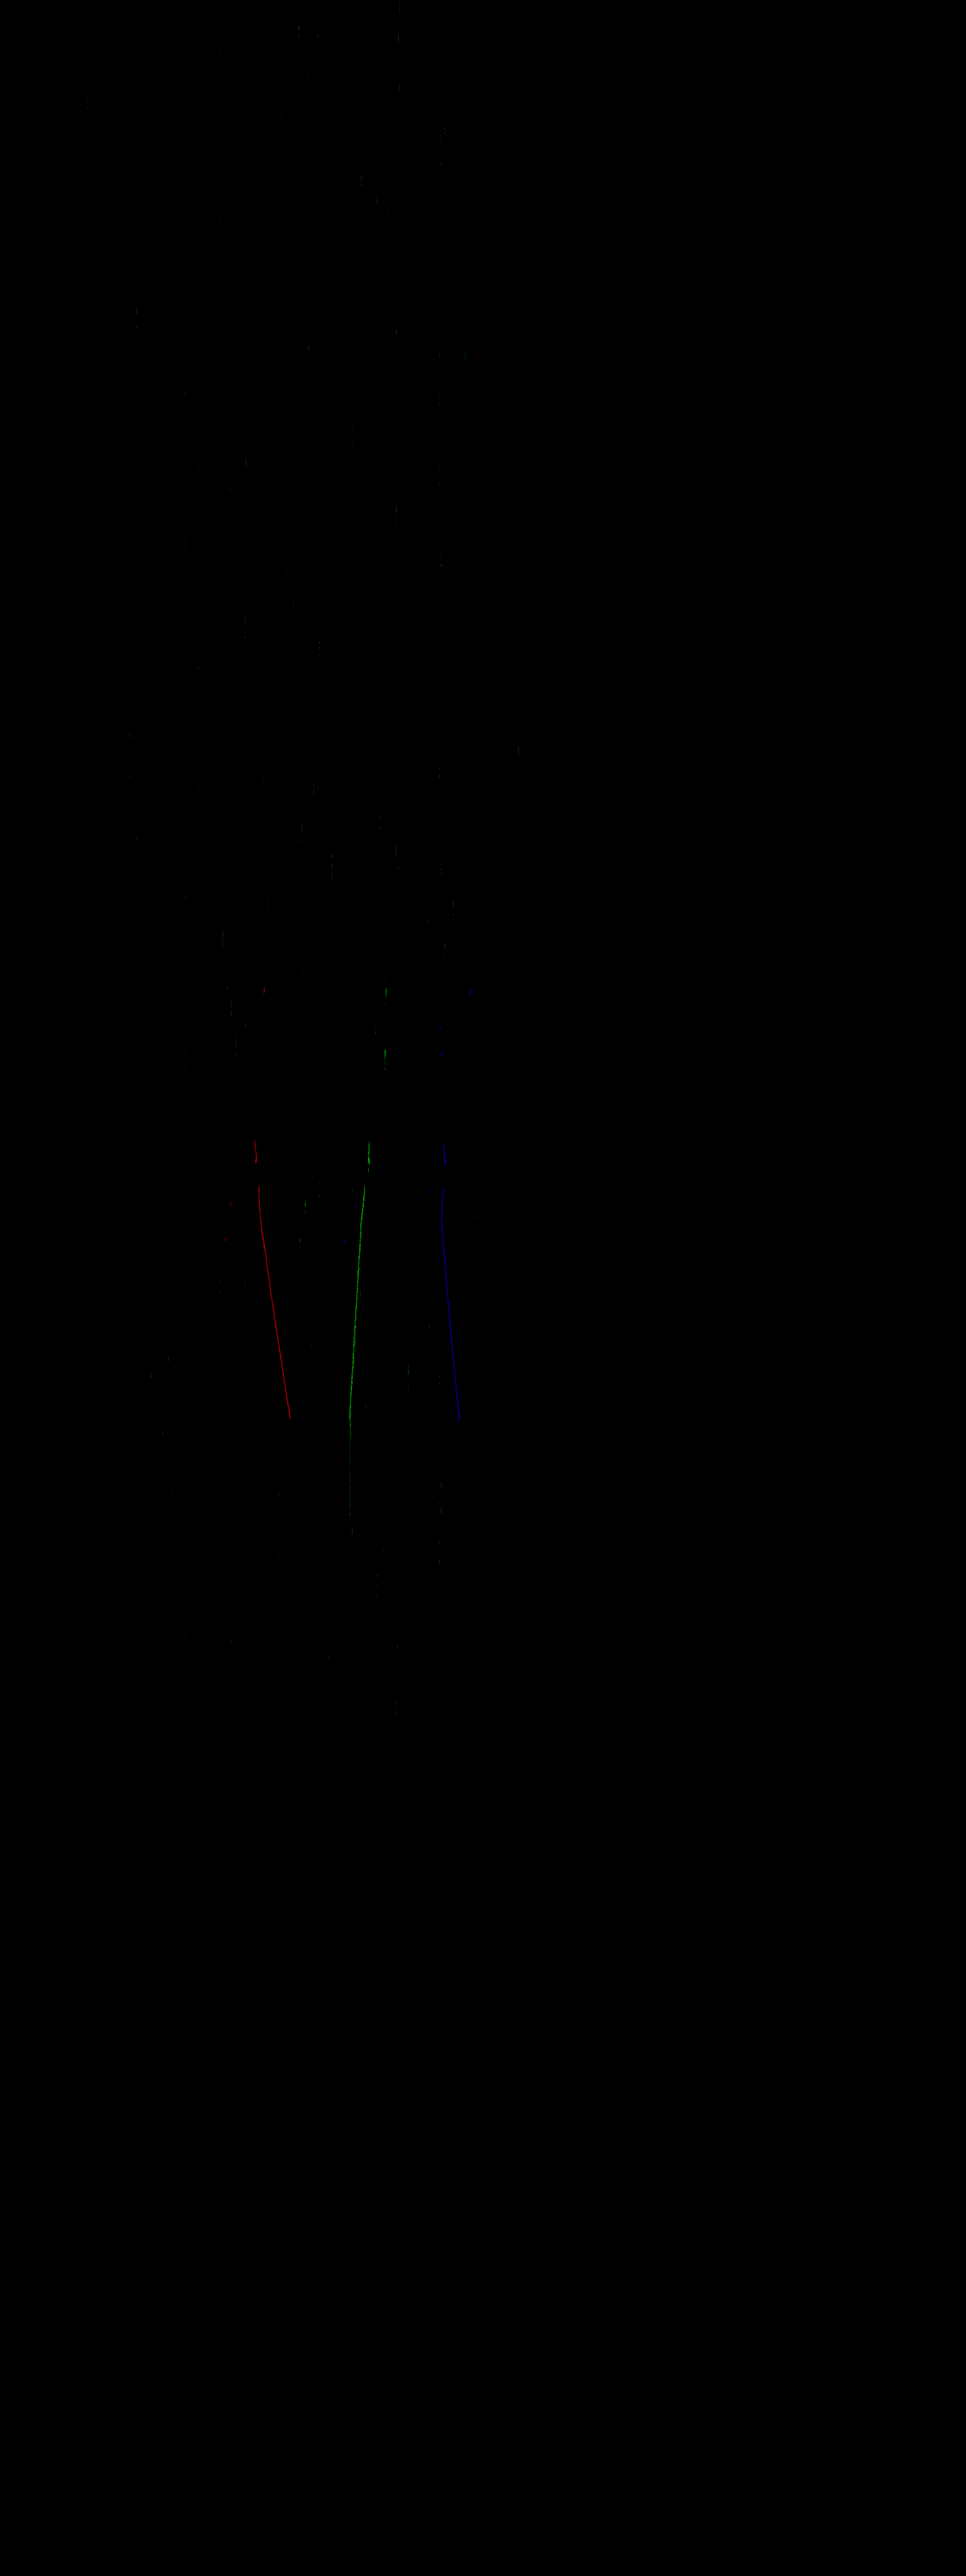

In [2]:
_file = h5py.File('/media/kwierman/KJWPassport/kevlar/run/output.h5','r')
wires = _file['image/wires']
n = 0
scale = 100
thresh = 25
image = wires[n]
#image = image[:,1000:2000,:]
buff = np.ndarray(shape=(image.shape[1], image.shape[2],
                       image.shape[0]),
                        dtype=np.uint8)
for i in range(3):
    buff[:, :, i] = image[i, :, :]
buff = buff * scale
buff = threshold(buff, threshmin=thresh) + threshold(buff, threshmax=-thresh)
imsave('1.png', buff)
Image('1.png')

In [3]:
segments = _file['segments/type']
print segments.shape
particles = _file['label/type']
print particles[n]

(5019, 6)
[0 0 1 0 0 0 0 0 2 0]


In [4]:
def segments_for_event_particle_plane(segments, event, particle, plane):
    for segment in segments:
        if segment[0]>event:
            raise StopIteration()
        if segment[2] == particle and segment[3]==plane:
            yield [segment[4], segment[5]]

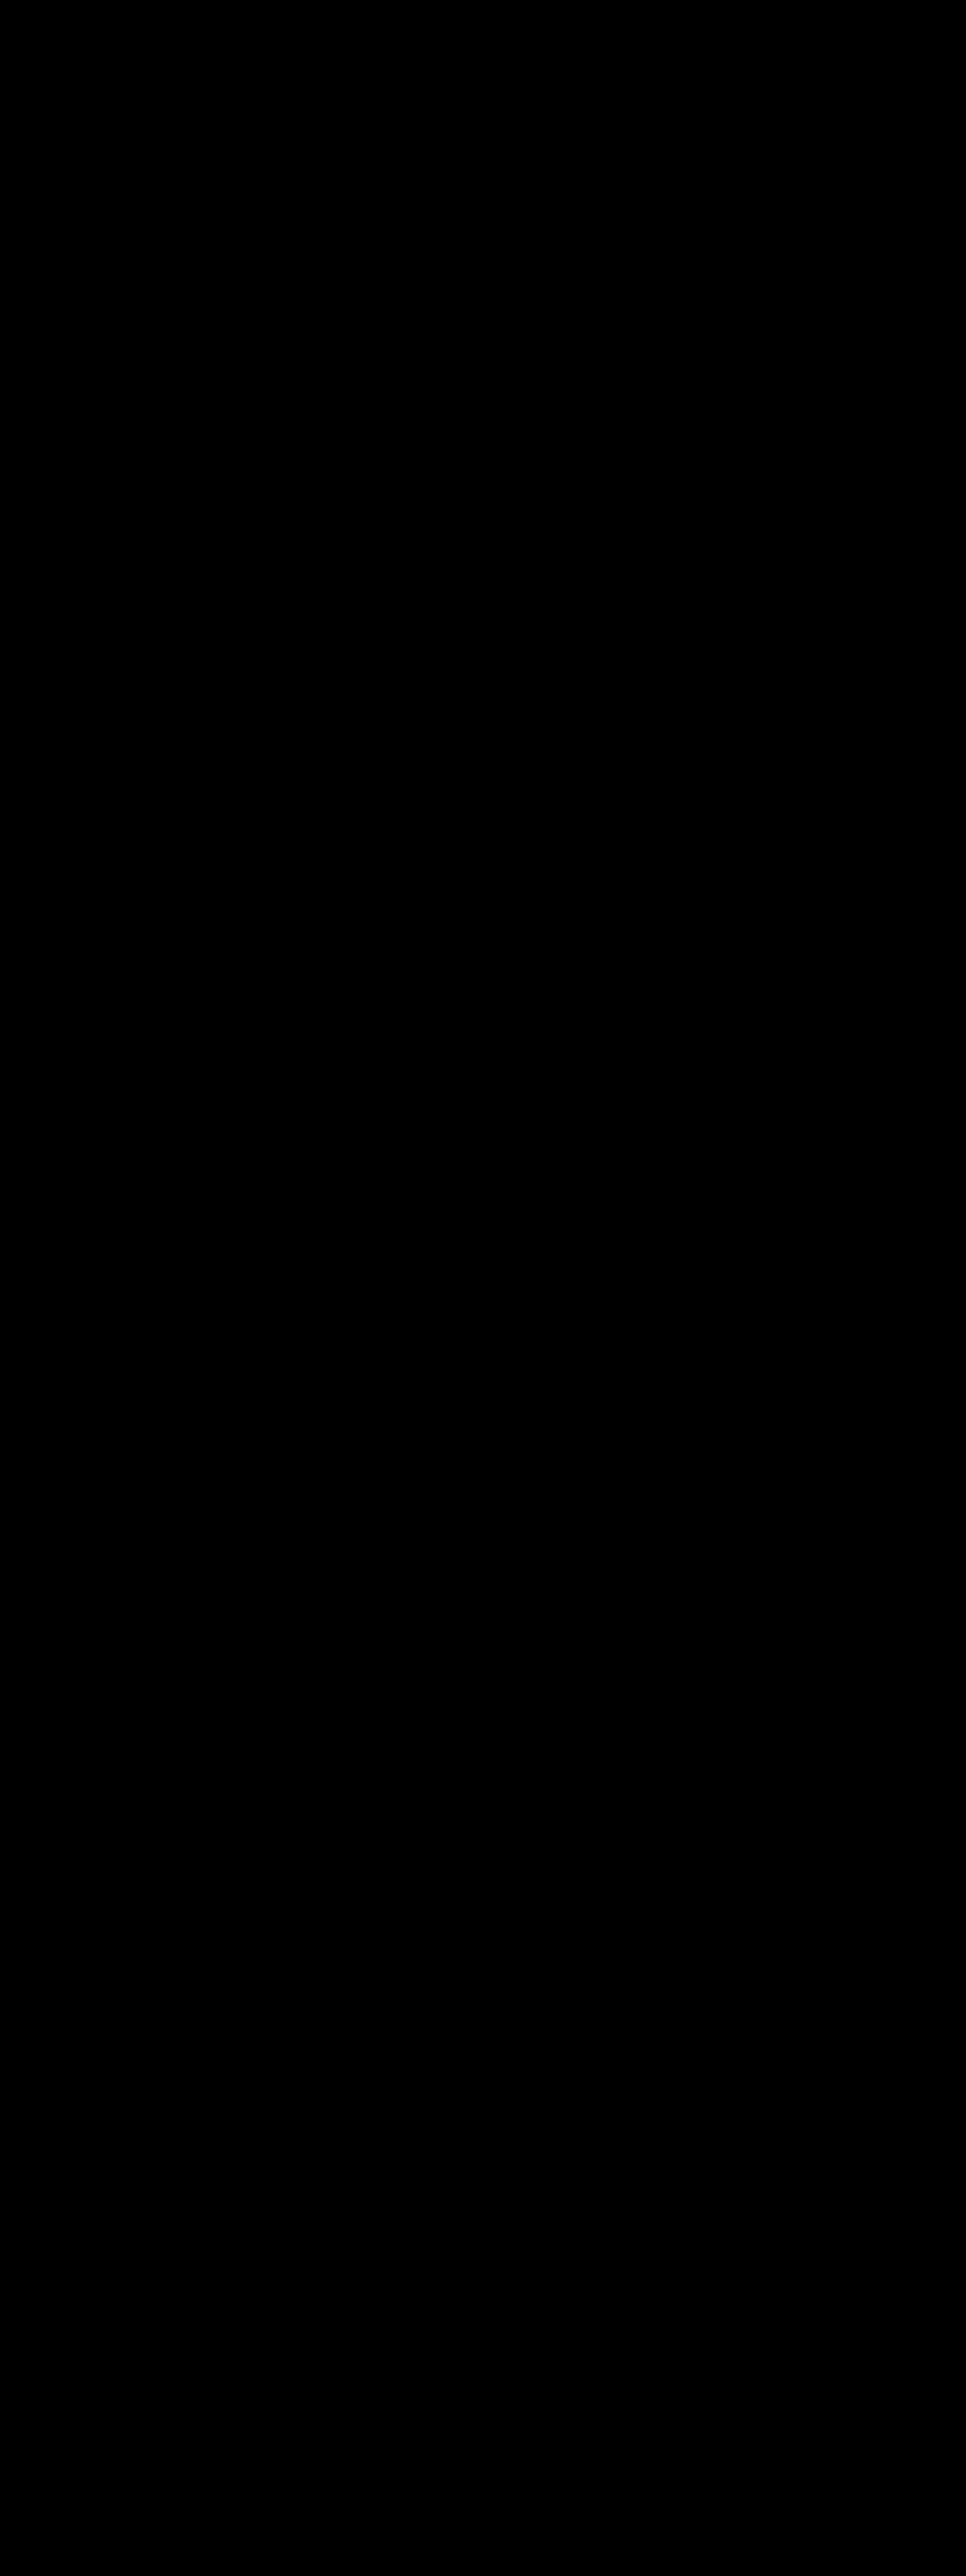

In [10]:
kaon_overlay = np.zeros(shape=buff.shape)
for plane in range(3):
    for i in range(10):
        for kaon in segments_for_event_particle_plane(segments, n+1, 2, plane):
            kaon_overlay[kaon[1]][kaon[0]][plane] = 255
imsave('kaons.png', kaon_overlay)
Image('kaons.png')

In [7]:
print [i for i in segments]

[array([   1,    0,    8,    0, 1065, 7640], dtype=int32), array([   1,    1,    8,    1, 1318, 7640], dtype=int32), array([   1,    2,    8,    2, 1711, 7640], dtype=int32), array([   1,    3,    8,    0, 1067, 7663], dtype=int32), array([   1,    4,    8,    1, 1316, 7663], dtype=int32), array([   1,    5,    8,    2, 1711, 7663], dtype=int32), array([   1,    6,    8,    0, 1067, 7663], dtype=int32), array([   1,    7,    8,    1, 1316, 7663], dtype=int32), array([   1,    8,    8,    2, 1711, 7663], dtype=int32), array([   1,    9,    8,    0, 1067, 7663], dtype=int32), array([   1,   10,    8,    1, 1316, 7663], dtype=int32), array([   1,   11,    8,    2, 1711, 7663], dtype=int32), array([   1,   12,    8,    0, 1067, 7663], dtype=int32), array([   1,   13,    8,    1, 1316, 7663], dtype=int32), array([   1,   14,    8,    2, 1711, 7663], dtype=int32), array([   1,    0,    7,    0, 1067, 7663], dtype=int32), array([   1,    1,    7,    1, 1316, 7663], dtype=int32), array([   1, 